<a href="https://colab.research.google.com/github/LaetitiaVerel/Odyssey-Quests/blob/master/Linear%20Regression%201%20Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               365 non-null    object 
 1   MAX_TEMPERATURE_C  365 non-null    int64  
 2   MIN_TEMPERATURE_C  365 non-null    int64  
 3   SUNHOUR            365 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 11.5+ KB


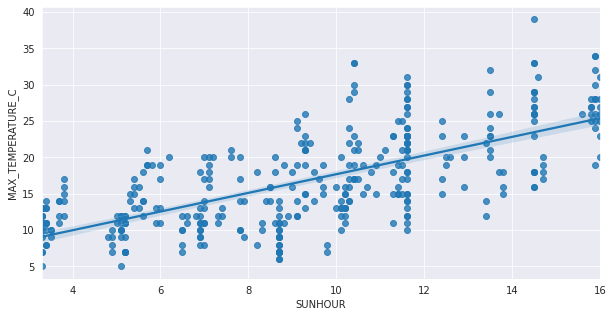

In [ ]:
# Your code here :

sns.set_style("darkgrid")

fig = plt.figure(figsize = (10, 5))

sns.regplot(x = "SUNHOUR", y = "MAX_TEMPERATURE_C", data = df_weather)

## Train the model
You just have to read and execute the code below

In [ ]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [ ]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("interception :", modelLR.intercept_)


coefficient : [1.28422116]
interception : 4.8472953557195435


## Prediction for 1 value

In [ ]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]] 

*Why ? We'll see that in the next quest.*

In [ ]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
modelLR.predict(df_weather[['SUNHOUR']])

df_weather['PREDICT'] = modelLR.predict(df_weather[['SUNHOUR']])

## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is stored in a column, you can now visualize it.

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

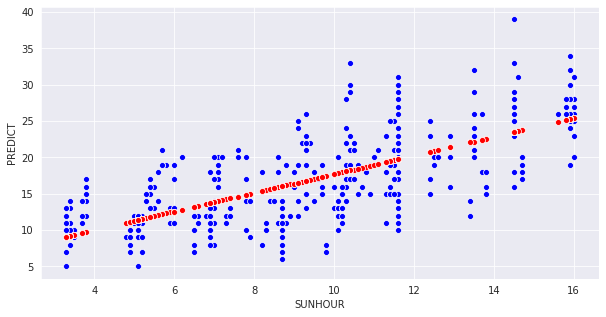

In [ ]:
# Your code here :

from sklearn.linear_model import LinearRegression

sns.set_style("darkgrid")

fig = plt.figure(figsize = (10, 5))

modelLR = LinearRegression().fit(X, y)
df_weather['PREDICT'] = modelLR.predict(df_weather[['SUNHOUR']])

sns.scatterplot(x = "SUNHOUR", y = "MAX_TEMPERATURE_C", data = df_weather, color = "blue")
sns.scatterplot(x = "SUNHOUR", y = "PREDICT", data = df_weather, color = "red")

Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

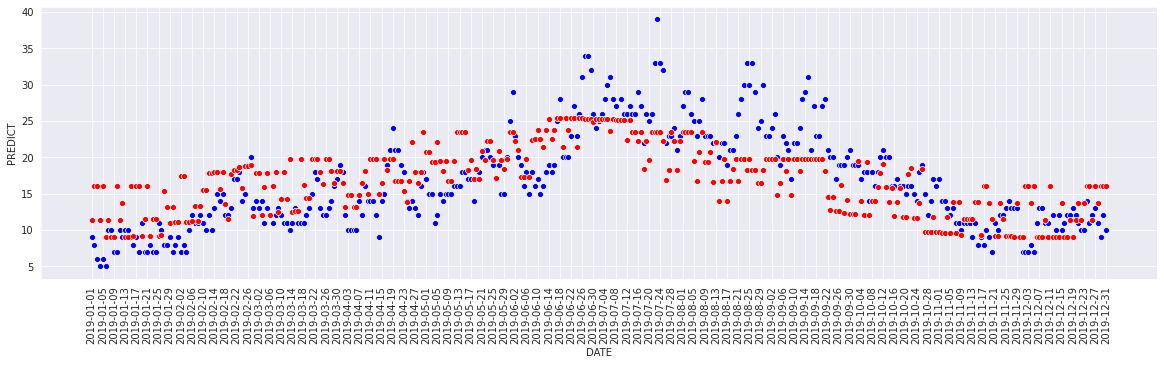

In [ ]:
# Your code here :

sns.set_style("darkgrid")

fig = plt.figure(figsize = (20, 5))

sns.scatterplot(x = "DATE", y = "MAX_TEMPERATURE_C", data = df_weather, color = "blue")
sns.scatterplot(x = "DATE", y = "PREDICT", data = df_weather, color = "red")

plt.xticks(range(0, 365, 4), rotation = 90)

plt.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

In [ ]:
# Your code here :
from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C']] 
y = df_weather[['MAX_TEMPERATURE_C']]

modelLR = LinearRegression().fit(X, y)

df_weather['PREDICT2'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C']])

df_weather

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,PREDICT2
0,2019-01-01,9,4,5.1,10.579999
1,2019-01-02,8,5,8.7,11.802741
2,2019-01-03,6,0,8.7,5.689031
3,2019-01-04,5,-1,5.1,4.466289
4,2019-01-05,6,-1,8.7,4.466289
...,...,...,...,...,...
360,2019-12-27,13,10,8.7,17.916452
361,2019-12-28,11,5,6.9,11.802741
362,2019-12-29,9,2,8.7,8.134515
363,2019-12-30,12,4,8.7,10.579999


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

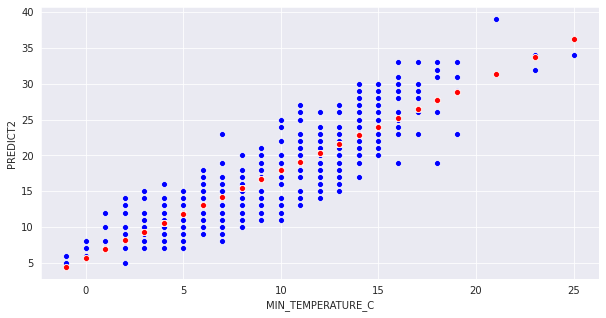

In [ ]:
#Your code here :

sns.set_style("darkgrid")

fig = plt.figure(figsize = (10, 5))

sns.scatterplot(x = "MIN_TEMPERATURE_C", y = "MAX_TEMPERATURE_C", data = df_weather, color = "blue")
sns.scatterplot(x = "MIN_TEMPERATURE_C", y = "PREDICT2", data = df_weather, color = "red")

## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

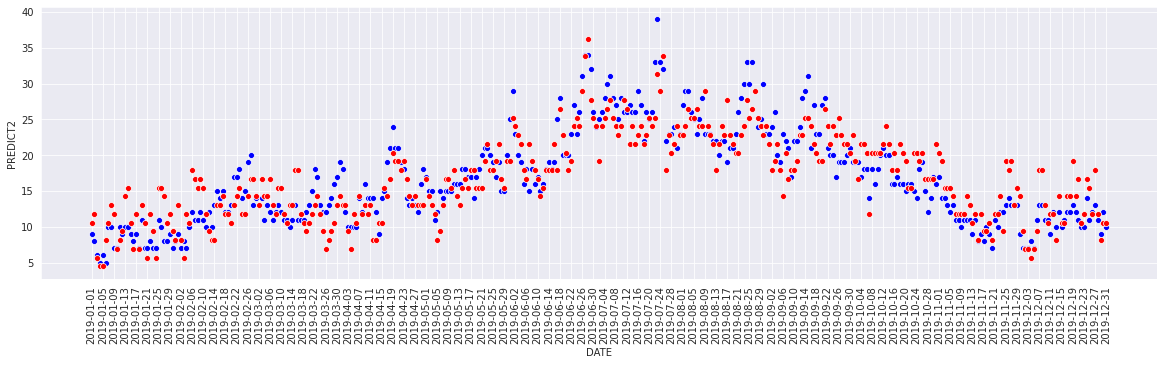

In [ ]:
# Your code here :

sns.set_style("darkgrid")

fig = plt.figure(figsize = (20, 5))

plt.xticks(range(0, 365, 4), rotation = 90)

sns.scatterplot(x = "DATE", y = "MAX_TEMPERATURE_C", data = df_weather, color = "blue")
sns.scatterplot(x = "DATE", y = "PREDICT2", data = df_weather, color = "red")